# Objective 2

This project will also **examine the ratio of men and women participation over the years** (i.e., evaluate whether the female-to-male ratio has been increasing over the years and identify if there is an over or under-representation of any gender). This analysis will help us understand whether the Olympics creates an inclusive space and provides men and women with equal opportunities in both the Summer and Winter Olympics.

## Data Preprocessing Part 1

In [58]:
import pandas as pd

athlete_df = pd.read_csv('/content/athletes_data_raw.csv')
hosts_df = pd.read_csv('/content/host_countries.csv')
pd.set_option('display.max_rows', None) # print the full dfs with scrolling view
pd.set_option('display.min_rows', None)

hosts_df.head()

,year,season,city,country,region
0,1896,Summer,Athens,Greece,Europe
1,1900,Summer,Paris,France,Europe
2,1904,Summer,St. Louis,United States,North America
3,1908,Summer,London,United Kingdom,Europe
4,1912,Summer,Stockholm,Sweden,Europe


In [59]:
athlete_df.head()

,id,name,gender,born,died,height,weight,team,game,noc,sport,event,medal
0,131892,Meryem Erdoğan,Female,24 April 1990,NaN,172 cm,55 kg,Türkiye,2016 Summer Olympics,TUR,Athletics,"Athletics, Marathon, Women(Olympic)",NaN
1,131892,Meryem Erdoğan,Female,24 April 1990,NaN,172 cm,55 kg,Türkiye,2020 Summer Olympics,TUR,Athletics,"Athletics, Marathon, Women(Olympic)",NaN
2,131892,Meryem Erdoğan,Female,24 April 1990,NaN,172 cm,55 kg,Türkiye,2020 Summer Olympics,TUR,Athletics,"Athletics, Marathon, Women(Olympic)",NaN
3,4300,Maurice Maina,Male,1 January 1963,NaN,158 cm,47 kg,Kenya,1988 Summer Olympics,KEN,Boxing,"Boxing, Light-Flyweight, Men(Olympic)",NaN
4,4300,Maurice Maina,Male,1 January 1963,NaN,158 cm,47 kg,Kenya,1988 Summer Olympics,KEN,Boxing,"Boxing, Light-Flyweight, Men(Olympic)",NaN


In [60]:
print(athlete_df.dtypes)

id         int64
name      object
gender    object
born      object
died      object
height    object
weight    object
team      object
game      object
noc       object
sport     object
event     object
medal     object
dtype: object


In [61]:
athlete_df.isna().sum()

,0
id,0
name,0
gender,0
born,9316
died,359755
height,127511
weight,136329
team,0
game,0
noc,0


In [62]:
athlete_df.shape

(476348, 13)

In [63]:
athlete_df['born'] = pd.to_datetime(athlete_df['born'], errors='coerce') # Use errors='coerce' to handle invalid dates

# Print the updated DataFrame to check if the conversion was successful
print(athlete_df.dtypes)

id                 int64
name              object
gender            object
born      datetime64[ns]
died              object
height            object
weight            object
team              object
game              object
noc               object
sport             object
event             object
medal             object
dtype: object


In [64]:
duplicate_rows = athlete_df[athlete_df.duplicated()]


In [65]:
# Remove duplicate rows based on all columns
athlete_df = athlete_df.drop_duplicates()

# Print the updated DataFrame to check if the duplicates were removed
print(athlete_df.shape)


(318961, 13)


In [66]:

num_duplicates = athlete_df.duplicated().sum()

print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


In [67]:
# Drop multiple columns by passing them as a list to the 'labels' argument
athlete_df = athlete_df.drop(labels=['died', 'born', 'height', 'weight', 'name'], axis=1)

# Print the updated DataFrame to check if the columns were dropped
print(athlete_df.head())

       id  gender            team                  game  noc      sport  \
0  131892  Female         Türkiye  2016 Summer Olympics  TUR  Athletics   
1  131892  Female         Türkiye  2020 Summer Olympics  TUR  Athletics   
3    4300    Male           Kenya  1988 Summer Olympics  KEN     Boxing   
5   60239    Male  Czechoslovakia  1972 Summer Olympics  TCH  Wrestling   
7  129369  Female         Bahrain  2016 Summer Olympics  BRN  Athletics   

                                               event   medal  
0                Athletics, Marathon, Women(Olympic)     NaN  
1                Athletics, Marathon, Women(Olympic)     NaN  
3              Boxing, Light-Flyweight, Men(Olympic)     NaN  
5  Wrestling, Featherweight, Freestyle, Men(Olympic)     NaN  
7                Athletics, Marathon, Women(Olympic)  Silver  


In [68]:
# - replace medal values with zero that are Nan

# Fill NaN values in the 'medal' column with 0
athlete_df['medal'] = athlete_df['medal'].fillna(0)

print(athlete_df.head())


       id  gender            team                  game  noc      sport  \
0  131892  Female         Türkiye  2016 Summer Olympics  TUR  Athletics   
1  131892  Female         Türkiye  2020 Summer Olympics  TUR  Athletics   
3    4300    Male           Kenya  1988 Summer Olympics  KEN     Boxing   
5   60239    Male  Czechoslovakia  1972 Summer Olympics  TCH  Wrestling   
7  129369  Female         Bahrain  2016 Summer Olympics  BRN  Athletics   

                                               event   medal  
0                Athletics, Marathon, Women(Olympic)       0  
1                Athletics, Marathon, Women(Olympic)       0  
3              Boxing, Light-Flyweight, Men(Olympic)       0  
5  Wrestling, Featherweight, Freestyle, Men(Olympic)       0  
7                Athletics, Marathon, Women(Olympic)  Silver  


In [69]:
athlete_df.head()

,id,gender,team,game,noc,sport,event,medal
0,131892,Female,Türkiye,2016 Summer Olympics,TUR,Athletics,"Athletics, Marathon, Women(Olympic)",0
1,131892,Female,Türkiye,2020 Summer Olympics,TUR,Athletics,"Athletics, Marathon, Women(Olympic)",0
3,4300,Male,Kenya,1988 Summer Olympics,KEN,Boxing,"Boxing, Light-Flyweight, Men(Olympic)",0
5,60239,Male,Czechoslovakia,1972 Summer Olympics,TCH,Wrestling,"Wrestling, Featherweight, Freestyle, Men(Olympic)",0
7,129369,Female,Bahrain,2016 Summer Olympics,BRN,Athletics,"Athletics, Marathon, Women(Olympic)",Silver


In [70]:
print(athlete_df.shape)

(318961, 8)


In [71]:
summer_df = athlete_df[athlete_df['game'].str.contains('Summer')]

In [72]:
summer_df.head()

,id,gender,team,game,noc,sport,event,medal
0,131892,Female,Türkiye,2016 Summer Olympics,TUR,Athletics,"Athletics, Marathon, Women(Olympic)",0
1,131892,Female,Türkiye,2020 Summer Olympics,TUR,Athletics,"Athletics, Marathon, Women(Olympic)",0
3,4300,Male,Kenya,1988 Summer Olympics,KEN,Boxing,"Boxing, Light-Flyweight, Men(Olympic)",0
5,60239,Male,Czechoslovakia,1972 Summer Olympics,TCH,Wrestling,"Wrestling, Featherweight, Freestyle, Men(Olympic)",0
7,129369,Female,Bahrain,2016 Summer Olympics,BRN,Athletics,"Athletics, Marathon, Women(Olympic)",Silver


In [105]:

# this has the youth olympics removed
summer_df = summer_df[~summer_df['game'].str.contains('Youth')] # Remove Summer Youth Olympics
summer_df.head()

# Group by game and gender, and count the number of athletes
gender_game_counts = summer_df.groupby(['game', 'gender'])['gender'].count().unstack()

# Print the result
print(gender_game_counts)



gender                Female  Male
game                              
1896 Summer Olympics       2   614
1900 Summer Olympics      63  3313
1904 Summer Olympics      17  2851
1908 Summer Olympics      58  3944
1912 Summer Olympics     103  5298
1920 Summer Olympics     168  4504
1924 Summer Olympics     268  6112
1928 Summer Olympics     472  5069
1932 Summer Olympics     285  2552
1936 Summer Olympics     515  6670
1948 Summer Olympics     685  6382
1952 Summer Olympics    1589  7696
1956 Summer Olympics     923  4405
1960 Summer Olympics    1487  7085
1964 Summer Olympics    1421  6769
1968 Summer Olympics    1952  7325
1972 Summer Olympics    2353  8542
1976 Summer Olympics    2311  6739
1980 Summer Olympics    1851  5648
1984 Summer Olympics    2604  7509
1988 Summer Olympics    3808  8972
1992 Summer Olympics    4241  9273
1996 Summer Olympics    5093  8924
2000 Summer Olympics    5525  8516
2004 Summer Olympics    5679  8083
2008 Summer Olympics    5985  7993
2012 Summer Olympics

In [106]:


# Add a row for 2024 Summer Olympics with 5250 female and 5250 male
new_row = pd.DataFrame({'game': ['2024 Summer Olympics'], 'Female': [5250], 'Male': [5250]})
gender_game_counts = pd.concat([gender_game_counts, new_row.set_index('game')], axis=0)

# Print the updated result
print(gender_game_counts)


                      Female  Male
game                              
1896 Summer Olympics       2   614
1900 Summer Olympics      63  3313
1904 Summer Olympics      17  2851
1908 Summer Olympics      58  3944
1912 Summer Olympics     103  5298
1920 Summer Olympics     168  4504
1924 Summer Olympics     268  6112
1928 Summer Olympics     472  5069
1932 Summer Olympics     285  2552
1936 Summer Olympics     515  6670
1948 Summer Olympics     685  6382
1952 Summer Olympics    1589  7696
1956 Summer Olympics     923  4405
1960 Summer Olympics    1487  7085
1964 Summer Olympics    1421  6769
1968 Summer Olympics    1952  7325
1972 Summer Olympics    2353  8542
1976 Summer Olympics    2311  6739
1980 Summer Olympics    1851  5648
1984 Summer Olympics    2604  7509
1988 Summer Olympics    3808  8972
1992 Summer Olympics    4241  9273
1996 Summer Olympics    5093  8924
2000 Summer Olympics    5525  8516
2004 Summer Olympics    5679  8083
2008 Summer Olympics    5985  7993
2012 Summer Olympics

Made a new dataframe with 2024 summer olympics data about males to females. Used verified source [13]  to confirm this.




In [88]:
# # Create a new DataFrame for summer_df with updated results for 2024
# summer_df_updated = summer_df.copy()  # Create a copy to avoid modifying the original DataFrame

# # Add a new row for 2024 Summer Olympics with 5250 female and 5250 male athletes
# new_athletes_2024 = pd.DataFrame({
#     'game': ['2024 Summer Olympics'] * 10500,  # Assuming 10500 athletes in total
#     'gender': ['Female'] * 5250 + ['Male'] * 5250,
#     'sport': [''] * 10500,
#     'country': [''] * 10500,
#     'medal': [0] * 10500
# })
# summer_df_updated = pd.concat([summer_df_updated, new_athletes_2024], ignore_index=True)

## Exploratory Data Analysis (EDA) Part 1

In [76]:
import matplotlib.pyplot as plt # Import the pyplot submodule for plotting functions

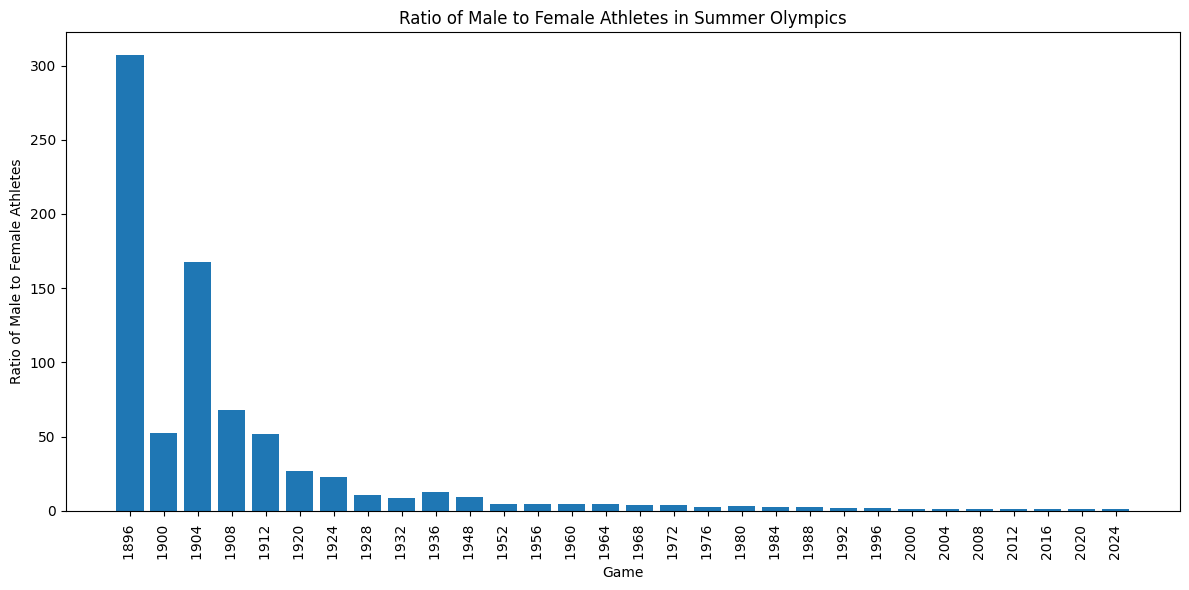

In [108]:

# Calculate the ratio of males to females for each game
gender_ratio = gender_game_counts['Male'] / gender_game_counts['Female']

# Create a bar chart
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.bar(gender_ratio.index.str.replace('Summer Olympics', ''), gender_ratio.values) #Remove 'Summer Olympics' from x-axis
plt.xlabel('Game')
plt.ylabel('Ratio of Male to Female Athletes')
plt.title('Ratio of Male to Female Athletes in Summer Olympics')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()



This chart shows the ratio of males to females for each game, and the ratio has been going down over the years as you can see. Women first competed in the Olympics in 1900, during the Paris Games, where 22 women out of 997 total athletes participated in five sports: tennis, sailing, croquet, equestrianism, and golf. [14] However, their participation was limited, and many sporting events were still closed to women for decades. Women's inclusion was slow, particularly in sports perceived as demanding physical strength or endurance, such as track and field and swimming.

The 1896 Summer Olympics were held in Athens, Greece and did not officially allow female athletes to compete. The games were made for male competitors, it reflects broader societal norms of the time, which restricted female participation. The 2 women that did compete, were not official competitors which were Stamata Revithi (a Greek women who tried to compete in a marathon and denied entry, she completed the race unofficially) and Melpomene who also tried to run a marathon but was restricted. It wasn't until the 1900 Paris Olympics that women were allowed to compete in a limited number of events. [15]

In 2024, there was an equal amount of males to females, 5250 to 5250.




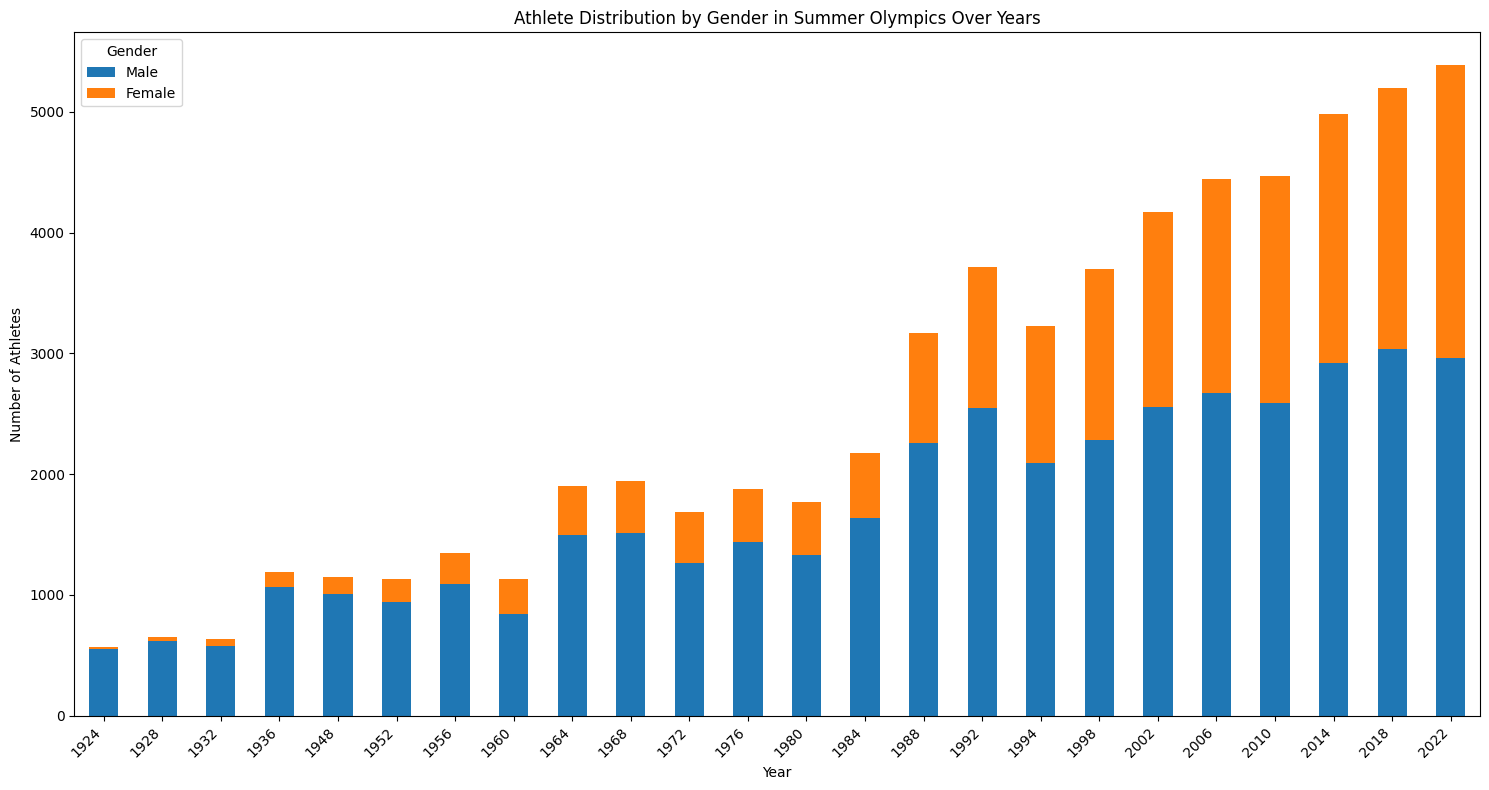

In [109]:

# Calculate the total number of athletes for each year
gender_year_counts['Total'] = gender_year_counts['Male'] + gender_year_counts['Female']

# Calculate the percentage of male and female athletes for each year
gender_year_counts['Male Percentage'] = (gender_year_counts['Male'] / gender_year_counts['Total']) * 100
gender_year_counts['Female Percentage'] = (gender_year_counts['Female'] / gender_year_counts['Total']) * 100

# Create a stacked bar chart
ax = gender_year_counts[['Male', 'Female']].plot(kind='bar', stacked=True, figsize=(15, 8))

# Customize the chart
plt.title('Athlete Distribution by Gender in Summer Olympics Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Gender')

# Show the chart
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()


This graph shows the split between Males and Females in Summer Olympics over the years. Explanations are provided in previous captions about historical trends.

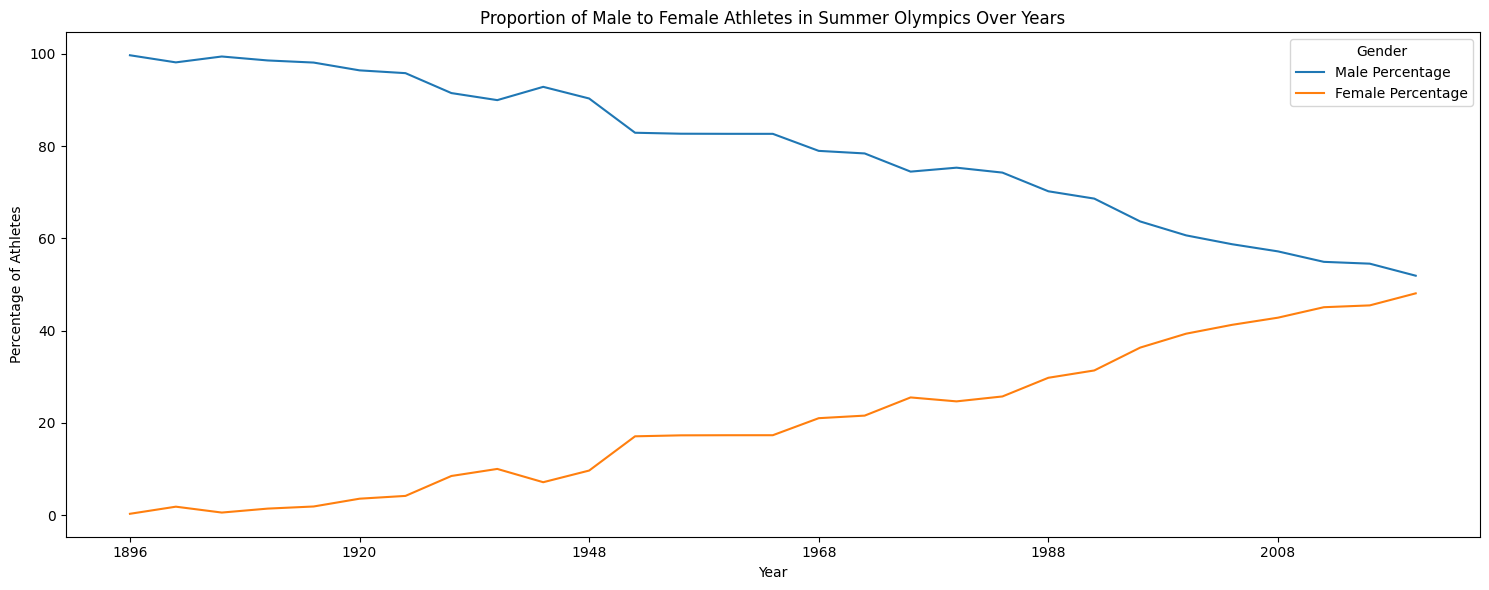

In [85]:
# Create a line chart for percentage change
ax2 = gender_year_counts[['Male Percentage', 'Female Percentage']].plot(kind='line', figsize=(15, 6))
plt.title('Proportion of Male to Female Athletes in Summer Olympics Over Years')
plt.xlabel('Year')
plt.ylabel('Percentage of Athletes')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

This graph shows a trend that the percentage of Male to Female is getting closer to 50/50 over time and in Paris 2024 they did reach this value. This is showing for Summer Olympics.

## Data Preprocessing Part 2

In [78]:
winter_df = athlete_df[athlete_df['game'].str.contains('Winter')]

In [79]:
winter_df.head()

,id,gender,team,game,noc,sport,event,medal
14,127874,Female,Germany,2014 Winter Olympics,GER,Speed Skating (Skating),"Speed Skating (Skating), 500 metres, Women(Oly...",0
22,101764,Female,Republic of Korea,2002 Winter Olympics,KOR,Short Track Speed Skating (Skating),"Short Track Speed Skating (Skating), 3,000 met...",Gold
32,87516,Male,Hungary,1936 Winter Olympics,HUN,Ice Hockey (Ice Hockey),"Ice Hockey (Ice Hockey), Ice Hockey, Men(Olympic)",0
74,101179,Female,Finland,2002 Winter Olympics,FIN,Biathlon,"Biathlon, 7.5 kilometres Sprint, Women(Olympic)",0
75,101179,Female,Finland,2002 Winter Olympics,FIN,Biathlon,"Biathlon, 10 kilometres Pursuit, Women(Olympic)",0


In [101]:
# Fill NaN values with 0 in winter_df
winter_df = winter_df.fillna(0)
print(winter_df.head())


        id  gender               team                  game  noc  \
14  127874  Female            Germany  2014 Winter Olympics  GER   
22  101764  Female  Republic of Korea  2002 Winter Olympics  KOR   
32   87516    Male            Hungary  1936 Winter Olympics  HUN   
74  101179  Female            Finland  2002 Winter Olympics  FIN   
75  101179  Female            Finland  2002 Winter Olympics  FIN   

                                  sport  \
14              Speed Skating (Skating)   
22  Short Track Speed Skating (Skating)   
32              Ice Hockey (Ice Hockey)   
74                             Biathlon   
75                             Biathlon   

                                                event medal  
14  Speed Skating (Skating), 500 metres, Women(Oly...     0  
22  Short Track Speed Skating (Skating), 3,000 met...  Gold  
32  Ice Hockey (Ice Hockey), Ice Hockey, Men(Olympic)     0  
74    Biathlon, 7.5 kilometres Sprint, Women(Olympic)     0  
75    Biathlon, 10 kil

In [81]:
print(winter_df.dtypes)

id         int64
gender    object
team      object
game      object
noc       object
sport     object
event     object
medal     object
dtype: object


In [102]:


# Remove rows containing "Youth Olympics"
gender_game_counts = gender_game_counts[~gender_game_counts.index.str.contains("Youth Olympics")]


# Print the result
print(gender_game_counts)


gender                Female  Male
game                              
1924 Winter Olympics      20   553
1928 Winter Olympics      33   619
1932 Winter Olympics      56   577
1936 Winter Olympics     128  1063
1948 Winter Olympics     138  1011
1952 Winter Olympics     189   944
1956 Winter Olympics     255  1090
1960 Winter Olympics     296   838
1964 Winter Olympics     407  1496
1968 Winter Olympics     434  1509
1972 Winter Olympics     419  1264
1976 Winter Olympics     438  1442
1980 Winter Olympics     436  1332
1984 Winter Olympics     544  1634
1988 Winter Olympics     906  2260
1992 Winter Olympics    1168  2545
1994 Winter Olympics    1129  2096
1998 Winter Olympics    1419  2279
2002 Winter Olympics    1609  2559
2006 Winter Olympics    1778  2669
2010 Winter Olympics    1877  2590
2014 Winter Olympics    2067  2917
2018 Winter Olympics    2160  3036
2022 Winter Olympics    2430  2958


## Exploratory Data Analysis (EDA) Part 2

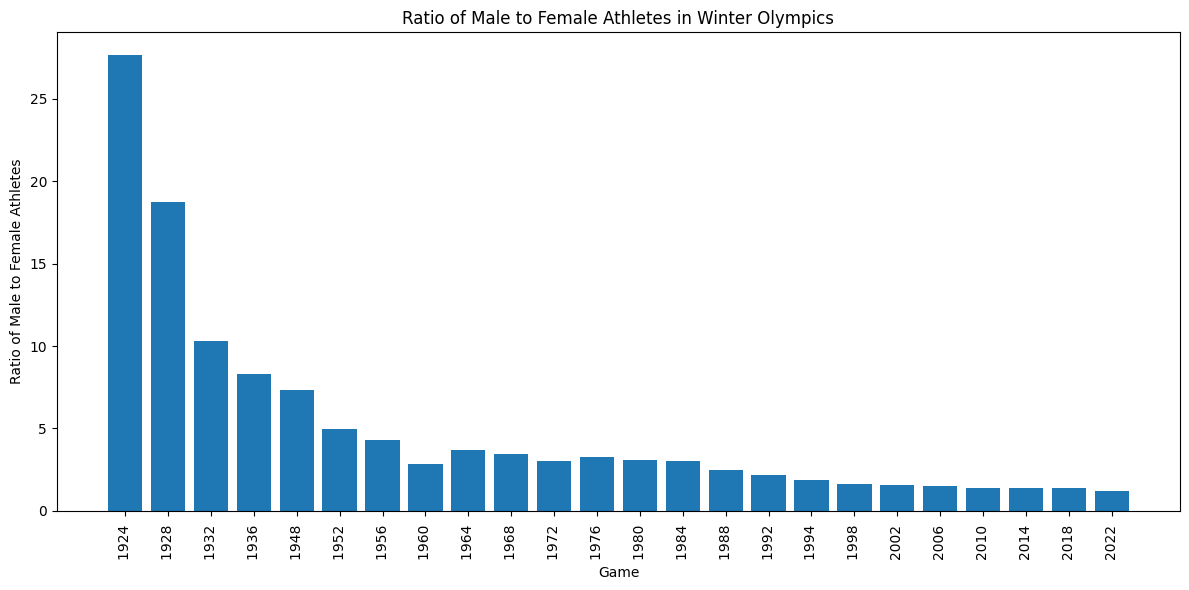

In [103]:

# Calculate the ratio of males to females for each game
gender_ratio_winter = gender_game_counts_winter['Male'] / gender_game_counts_winter['Female']


# Create a bar chart
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.bar(gender_ratio_winter.index.str.replace('Winter Olympics', ''), gender_ratio_winter.values) #Remove 'Summer Olympics' from x-axis
plt.xlabel('Game')
plt.ylabel('Ratio of Male to Female Athletes')
plt.title('Ratio of Male to Female Athletes in Winter Olympics')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


For Winter Olympics, the women participation has been increasing over the years. For the most recent year which was in 2022, there is a ratio of 1.3 Males to Females.

In 1960s, more women started participated because gender roles were shifting after the war and there was more flexibility for them to participate in skiing and figure skating.

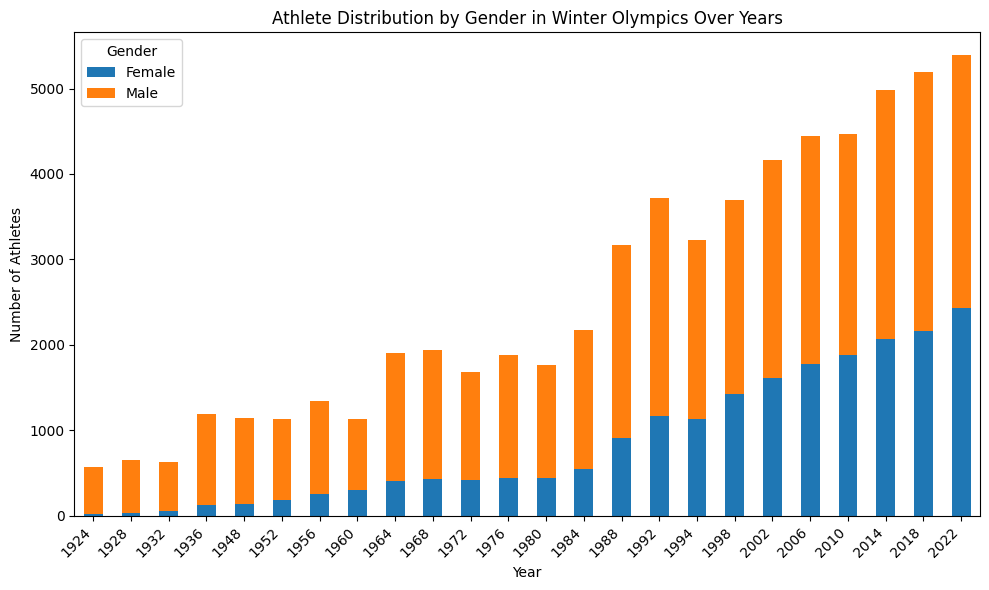

In [104]:


# Create a stacked bar chart
ax = gender_year_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

# Customize the chart
plt.title('Athlete Distribution by Gender in Winter Olympics Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Gender')

# Show the chart
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()



In 1932, the Winter Olympics were held in Lake Placid, USA. This led to increased opportunities for female athletes. Women competed in figure skating which was introduced in 1908 Summer Olympics and other events. Skiing also had an increased trend of women participating.

In the 1956 Winter Olympics in Italy, social roles of women began to shift after World War II, again more skiing had women in it and national strength of a country was more effectively displayed when gender equality was showcased promoting female athletes. There was media influence which gave more visibility to female athletes and popularized women's participation in sports. [16] [17]



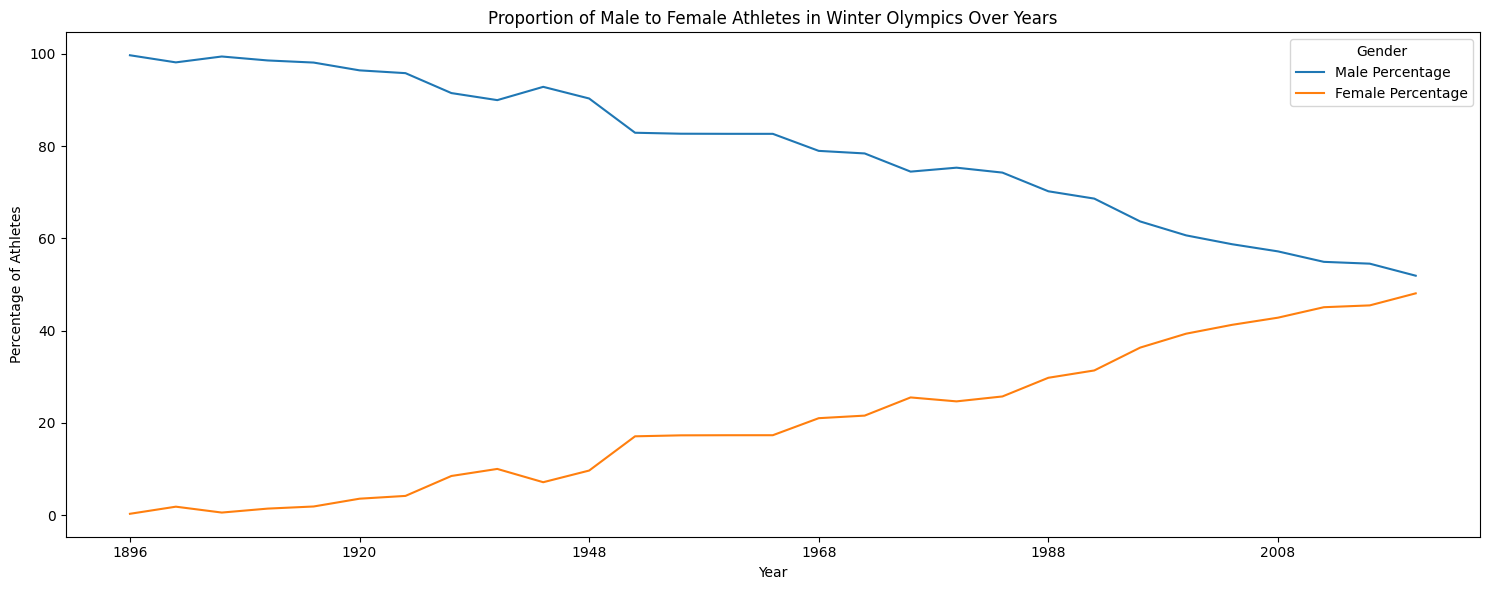

In [86]:
# Create a line chart for percentage change
ax2 = gender_year_counts[['Male Percentage', 'Female Percentage']].plot(kind='line', figsize=(15, 6))
plt.title('Proportion of Male to Female Athletes in Winter Olympics Over Years')
plt.xlabel('Year')
plt.ylabel('Percentage of Athletes')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


This graph shows a trend that the percentage of Male to Female is getting closer to 50/50 over time for the Winter Olympics.